In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as F
from torchvision import datasets, models
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models.segmentation.deeplabv3 import DeepLabHead

f:\python\python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import datetime
import random
from PIL import Image

In [3]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.optim as optim

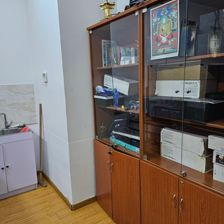

In [4]:
img = Image.open("test3.jpg")
img

In [5]:
np_img = np.array(img)

In [6]:
class DDN(nn.Module):
    def __init__(self):
        super(DDN, self).__init__()
        
        self.encoder = models.densenet169(weights=True, progress=True)
        self.encoder = nn.Sequential(*list(self.encoder.children())[:-1])
        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            nn.ConvTranspose2d(1664, 16,kernel_size=3, stride=1, padding=1,bias=False),
            nn.ConvTranspose2d(16, 8, kernel_size=2, stride=2, bias=False),
            nn.ConvTranspose2d(8, 4, kernel_size=2, stride=2, bias=False),
            nn.ConvTranspose2d(4, 2, kernel_size=2, stride=2, bias=False),
            nn.ConvTranspose2d(2, 1, kernel_size=2, stride=2, bias=False),
            
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
model = DDN()

f:\python\python37\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
model.load_state_dict(torch.load(".\\model\\2023-12-07_07-57__9.pth"))

<All keys matched successfully>

In [9]:
tensor = torch.tensor(np_img)

In [10]:
rgb_trans = A.Compose([
                A.Resize(width = 224, height = 224),
                A.Normalize(
                       mean = [0.0, 0.0, 0.0],
                        std = [1.0, 1.0, 1.0],
                        max_pixel_value=255.0
                    ),
                
                
                ToTensorV2()
            ])

In [11]:
tensor = rgb_trans(image = np_img)["image"]

In [12]:
r = model(tensor.unsqueeze(0))

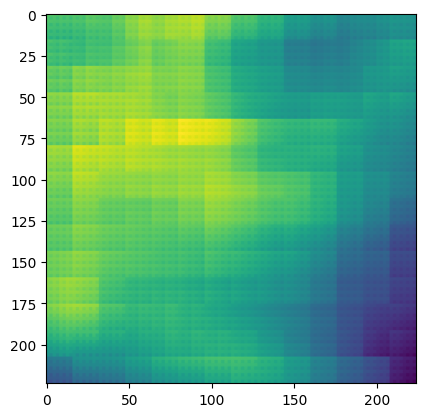

In [13]:
plt.imshow(r[0].permute(1,2,0).detach().numpy())
plt.show()

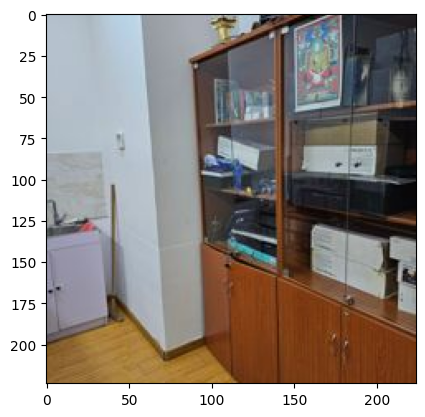

In [25]:
plt.imshow(tensor.permute(1,2,0))
plt.show()